<IPython.core.display.Javascript object>


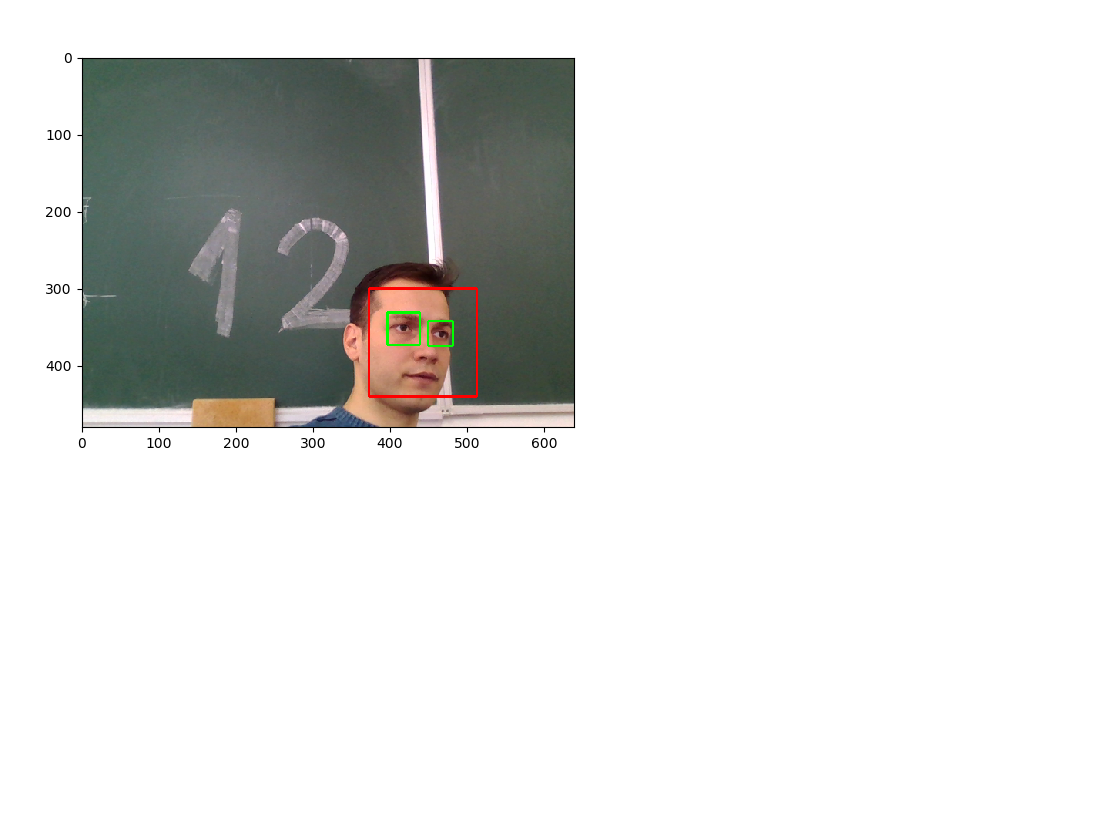

C:\Users\Daniel\Anaconda3\lib\site-packages\matplotlib\backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


In [ ]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import cv2
from matplotlib import pyplot as plt


stream = cv2.VideoCapture (0)
stream.open(0)
plt.ion()

if stream.isOpened ():
    stvoren, slika = stream.read()
    slika = cv2.cvtColor(slika, cv2.COLOR_BGR2RGB)
    kamera = plt.imshow(slika)
else:
    stvoren = False
    
while stvoren:
    stvoren, slika = stream.read()
    slika = cv2.cvtColor(slika, cv2.COLOR_BGR2RGB)
    
    
    detektor_oka = cv2.CascadeClassifier ("haarcascade_eye.xml");
    detektor_lica = cv2.CascadeClassifier ("haarcascade_frontalface_alt.xml");
    lica = detektor_lica.detectMultiScale (slika, 1.3, 5);
    
    for (x,y,w,h) in lica:
      cv2.rectangle (slika, (x,y), (x+w, y+h), (255, 0, 0), 2)
      slika_lica = slika[y:y+h, x:x+w]
      oci = detektor_oka.detectMultiScale (slika_lica)
      for (ox,oy,ow,oh) in oci:
        cv2.rectangle (slika_lica, (ox,oy), (ox+ow, oy+oh), (0, 255, 0), 2)
      
    kamera.set_data (slika)
    plt.draw()
    
    try:
        plt.pause(0.01)
    except:
        pass